# Structure property relationship analysis

This notebook explore the different structure property relationship between the building blocks, atoms and electronic properties in COMPAS-2x

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt

from func import calc_atomisation_energy
from itertools import product

from colors import atoms_colors, heterocycles_colors, kde_kwargs
# Reload imported libraries automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0').copy()
lala = pd.read_csv(".temp/data/compas-2x-lala.csv", index_col=0)
df = df.merge(lala[['name','lala', 'stereo', 'types']])

In [5]:
# electronic properties
props = ['homo_corr','lumo_corr','gap_corr','aip_corr','aea_corr','aepe_corr']
# group by
hue_by = ['cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']

# Binned average number of atoms in a molecule.

Horizontal Bar Chart of Atomic Composition of molecules depending on the value of the electronic properties (homo, lumo, gap, aip, aea, aepe).

The horizontal bar chart illustrates the relationship between a specific molecular property *(homo, lumo, gap, aip, aea, aepe)* and atom type.  Each bar represents a bin of property values, with colors indicating different atom types. Data is filtered to include only molecules possessing 9 rings. Bins are created using 30 intervals, and the Y-axis displays mean values of the specified atom type of the molecules within that bin.

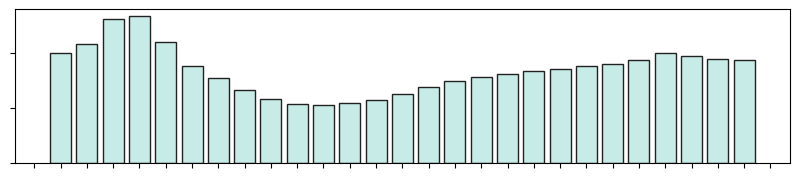

In [12]:
for i, (prop, (ring, color)) in enumerate(product(props,atoms_colors.items())):
    fig, ax = plt.subplots(figsize=(10, 2))
    bin_col = f'{prop.split("_")[0]}_bin'
    df[bin_col] = pd.cut(df[prop], bins=30)
    histogram = df.query('rings == 9').groupby(bin_col).mean(numeric_only=True)[ring].sort_index()
    ys = histogram.values
    bins = histogram.index
    xs = [str(round(b.right, 2)) for b in bins]
    ax.bar(xs, ys, color=color, edgecolor="#212121")
    # set x ticks
    ax.set_xlabel('')
    # hide x axis
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.png")
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.svg")
    # plt.close()
    break

    fig.suptitle(f"Color by bblock")
    plt.tight_layout()

# Binned average number of atoms in a molecule.

Horizontal Bar Chart of heterocyclic Composition of molecules depending on the value of the electronic properties (homo, lumo, gap, aip, aea, aepe).

The horizontal bar chart illustrates the relationship between a specific molecular property *(homo, lumo, gap, aip, aea, aepe)* and heterocycle type.  Each bar represents a bin of property values, with colors indicating different heterocycle. Data is filtered to include only molecules possessing 9 rings. Bins are created using 30 intervals, and the Y-axis displays mean values of the number heterocycle of the molecules within that bin.

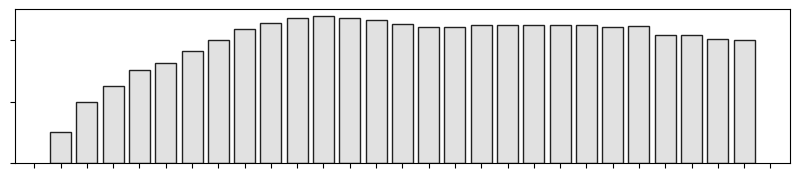

In [13]:
for i, (prop, (ring, color)) in enumerate(product(props,heterocycles_colors.items())):
    fig, ax = plt.subplots(figsize=(10, 2))
    bin_col = f'{prop.split("_")[0]}_bin'
    df[bin_col] = pd.cut(df[prop], bins=30)
    histogram = df.query('rings == 9').groupby(bin_col).mean(numeric_only=True)[ring].sort_index()
    ys = histogram.values
    bins = histogram.index
    xs = [str(round(b.right, 2)) for b in bins]
    ax.bar(xs, ys, color=color, edgecolor="#212121")
    # set x ticks
    ax.set_xlabel('')
    # hide x axis
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.png")
    plt.savefig(f".temp/figures/hbar-{prop}-{ring}.svg")
    # plt.close()
    break

    fig.suptitle(f"Color by bblock")
    plt.tight_layout()